# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import warnings

In [3]:
import covsirphy as cs
cs.__version__

'2.8.2'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/


Detailed citaition list:

Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
World Health Organization (2020), https://covid19.who.int
The COVID Tracking Project (2020), https://covidtracking.com
Ministry of Health of Croatia (2020), https://data.gov.hr/dataset/koronavirus/resource/08fab529-ebba-46c7-be79-05782ddb02ef
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/CSSEGISandData/COVID-19
Covid19data.com.au (2020), https://github.com/M3IT/COVID-19_Data
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/dsfsi/covid19za
COVID-19_plus_Russia GitHub repository (2020), https://github.com/grwlf/COVID-19_plus_Russia
COVID-19 Peru Data Repository (2020), https://github.com/jmcastagnetto/covid-19-peru-data
Twitter Web Scraper

### The number of cases (JHU style)

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [6]:
print(data_loader.covid19dh_citation)

Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
World Health Organization (2020), https://covid19.who.int
The COVID Tracking Project (2020), https://covidtracking.com
Ministry of Health of Croatia (2020), https://data.gov.hr/dataset/koronavirus/resource/08fab529-ebba-46c7-be79-05782ddb02ef
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/CSSEGISandData/COVID-19
Covid19data.com.au (2020), https://github.com/M3IT/COVID-19_Data
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/dsfsi/covid19za
COVID-19_plus_Russia GitHub repository (2020), https://github.com/grwlf/COVID-19_plus_Russia
COVID-19 Peru Data Repository (2020), https://github.com/jmcastagnetto/covid-19-peru-data
Twitter Web Scraper

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
208497,2020-09-04,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
208498,2020-09-05,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
208499,2020-09-06,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
208500,2020-09-07,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
208501,2020-09-08,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
208497,2020-09-04,Colombia,Vichada,14,0,0,14
208498,2020-09-05,Colombia,Vichada,14,0,0,14
208499,2020-09-06,Colombia,Vichada,14,0,0,14
208500,2020-09-07,Colombia,Vichada,14,0,0,14
208501,2020-09-08,Colombia,Vichada,14,0,0,14


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
169,2020-09-04,21475,2619,369,18487
170,2020-09-05,21656,2552,369,18735
171,2020-09-06,21772,2528,369,18875
172,2020-09-07,21849,2510,372,18967
173,2020-09-08,22019,2470,378,19171


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-09-04,26456630,7978087,873115,17605428,0.016501,0.332722,0.047250
2020-09-05,26720471,8029945,877684,17812842,0.016423,0.333318,0.046959
2020-09-06,26941677,8046215,881245,18014217,0.016355,0.334319,0.046638
2020-09-07,27145161,8071938,890208,18183015,0.016397,0.334922,0.046673
2020-09-08,27145680,8071368,890228,18184084,0.016397,0.334935,0.046672


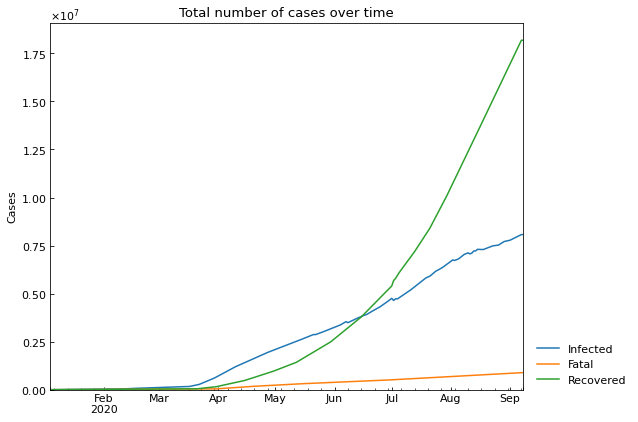

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [12]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
208,2020-09-04,70884,9132,1352,60400
209,2020-09-05,71483,8680,1361,61442
210,2020-09-06,71934,8502,1369,62063
211,2020-09-07,72245,8342,1380,62523
212,2020-09-08,72739,8078,1398,63263


In [13]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [14]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
206,2020-09-04,70268,8521,1330,60417
207,2020-09-05,70876,8082,1349,61445
208,2020-09-06,71419,7986,1357,62076
209,2020-09-07,71856,7957,1363,62536
210,2020-09-08,72234,7575,1377,63282


### Population in each country

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
208497,2020-09-04,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
208498,2020-09-05,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
208499,2020-09-06,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
208500,2020-09-07,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
208501,2020-09-08,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
195645,COL,Colombia,Vichada,2020-09-04,107808
195646,COL,Colombia,Vichada,2020-09-05,107808
195647,COL,Colombia,Vichada,2020-09-06,107808
195648,COL,Colombia,Vichada,2020-09-07,107808
195649,COL,Colombia,Vichada,2020-09-08,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
208497,2020-09-04,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
208498,2020-09-05,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
208499,2020-09-06,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
208500,2020-09-07,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
208501,2020-09-08,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
208497,2020-09-04,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
208498,2020-09-05,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
208499,2020-09-06,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
208500,2020-09-07,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
208501,2020-09-08,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
244,2020-09-04,1,1,1,0,0,1,1,3,2,2,1,30.56
245,2020-09-05,1,1,1,0,0,1,1,3,2,2,1,30.56
246,2020-09-06,1,1,1,0,0,1,1,3,2,2,1,30.56
247,2020-09-07,1,1,1,0,0,1,1,3,2,2,1,30.56
248,2020-09-08,1,1,1,0,0,1,1,3,2,2,1,30.56


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
244,2020-09-04,1,1,1,0,0,1,1,3,2,2,1,30.56
245,2020-09-05,1,1,1,0,0,1,1,3,2,2,1,30.56
246,2020-09-06,1,1,1,0,0,1,1,3,2,2,1,30.56
247,2020-09-07,1,1,1,0,0,1,1,3,2,2,1,30.56
248,2020-09-08,1,1,1,0,0,1,1,3,2,2,1,30.56


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

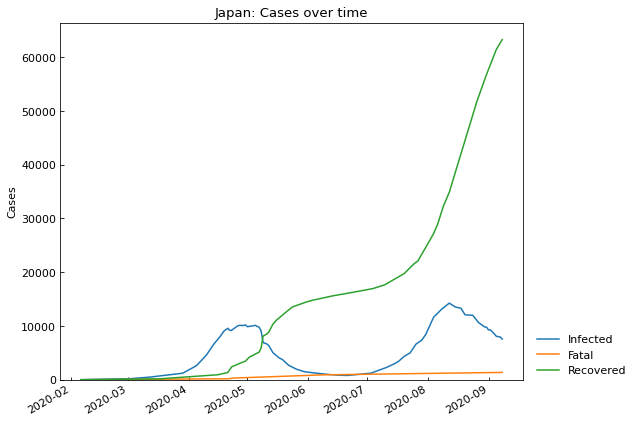

,Date,Confirmed,Infected,Fatal,Recovered
206,2020-09-04,70268,8521,1330,60417
207,2020-09-05,70876,8082,1349,61445
208,2020-09-06,71419,7986,1357,62076
209,2020-09-07,71856,7957,1363,62536
210,2020-09-08,72234,7575,1377,63282


In [26]:
import matplotlib
warnings.simplefilter("ignore", category=matplotlib.MatplotlibDeprecationWarning)
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

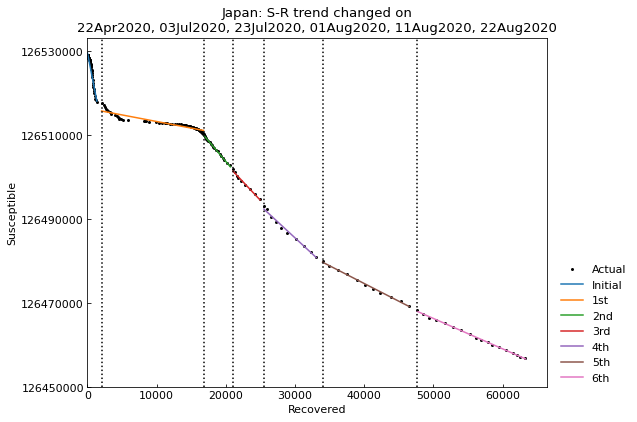

,Type,Start,End,Population
0th,Past,06Feb2020,21Apr2020,126529100
1st,Past,22Apr2020,02Jul2020,126529100
2nd,Past,03Jul2020,22Jul2020,126529100
3rd,Past,23Jul2020,31Jul2020,126529100
4th,Past,01Aug2020,10Aug2020,126529100
5th,Past,11Aug2020,21Aug2020,126529100
6th,Past,22Aug2020,08Sep2020,126529100


In [27]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [28]:
scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	6th phase (22Aug2020 - 08Sep2020): finished  525 trials in 0 min 20 sec

	3rd phase (23Jul2020 - 31Jul2020): finished  705 trials in 0 min 25 sec

	0th phase (06Feb2020 - 21Apr2020): finished 1367 trials in 1 min  0 sec

	1st phase (22Apr2020 - 02Jul2020): finished 1331 trials in 1 min  0 sec

	2nd phase (03Jul2020 - 22Jul2020): finished 1400 trials in 1 min  0 sec

	4th phase (01Aug2020 - 10Aug2020): finished 1500 trials in 1 min  0 sec

	5th phase (11Aug2020 - 21Aug2020): finished 1697 trials in 1 min  0 sec

Completed optimization. Total: 2 min 21 sec

In [29]:
scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/beta [day],alpha1 [-],1/alpha2 [day],1/gamma [day],RMSLE,Trials,Runtime
0th,Past,06Feb2020,21Apr2020,126529100,SIR-F,4.22,0.000302,0.001063,0.052213,0.011310,720,9,0.000,470,44,0.952248,1367,1 min 0 sec
1st,Past,22Apr2020,02Jul2020,126529100,SIR-F,0.41,0.067567,0.000571,0.015710,0.034756,720,31,0.068,876,14,0.772716,1331,1 min 0 sec
2nd,Past,03Jul2020,22Jul2020,126529100,SIR-F,2.02,0.000637,0.000117,0.073720,0.036280,720,6,0.001,4288,13,0.045108,1400,1 min 0 sec
3rd,Past,23Jul2020,31Jul2020,126529100,SIR-F,1.91,0.000086,0.000144,0.068053,0.035544,720,7,0.000,3467,14,0.033702,705,0 min 25 sec
4th,Past,01Aug2020,10Aug2020,126529100,SIR-F,1.81,0.000718,0.000120,0.054822,0.030220,720,9,0.001,4173,16,0.035112,1500,1 min 0 sec
5th,Past,11Aug2020,21Aug2020,126529100,SIR-F,0.88,0.000495,0.000344,0.040763,0.046079,720,12,0.000,1454,10,0.020414,1697,1 min 0 sec
6th,Past,22Aug2020,08Sep2020,126529100,SIR-F,0.72,0.015962,0.000121,0.033060,0.045065,720,15,0.016,4134,11,0.025716,525,0 min 20 sec


### Accuracy of estimation

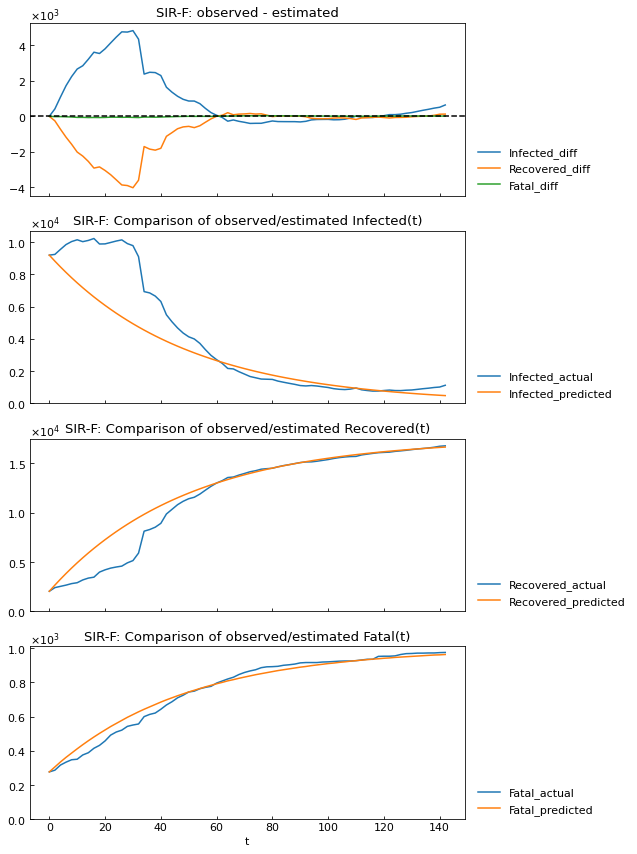

In [30]:
scenario.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
scenario.get("Rt", phase="4th")

1.81

### Show parameter history

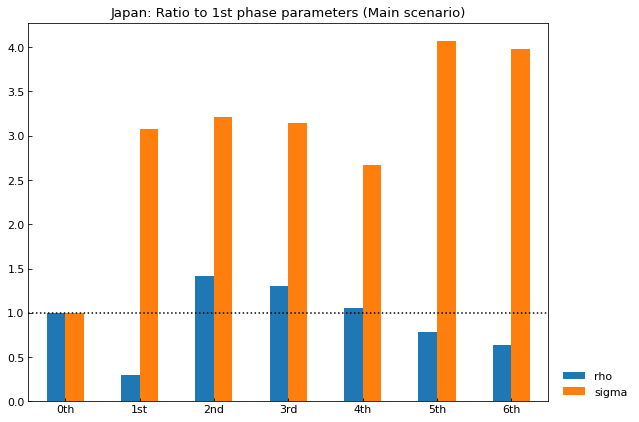

,0th,1st,2nd,3rd,4th,5th,6th
rho,1.0,0.300885,1.411911,1.303382,1.049974,0.780719,0.633188
sigma,1.0,3.073092,3.207826,3.142740,2.671978,4.074263,3.984584


In [32]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

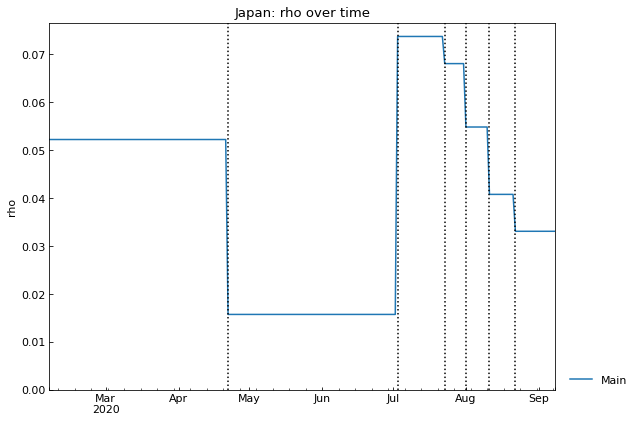

In [33]:
# version >= 2.8.0
_ = scenario.history(target="rho")

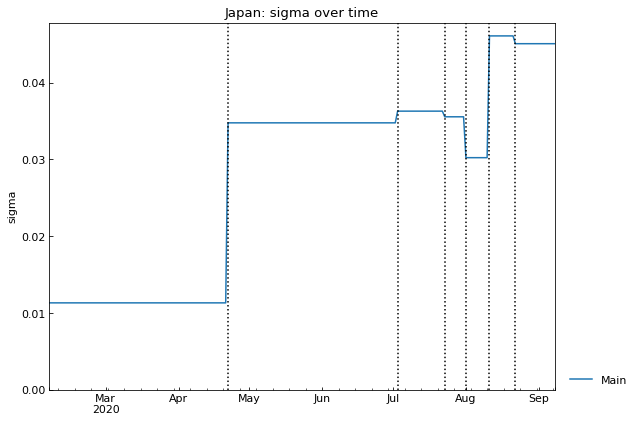

In [34]:
# version >= 2.8.0
_ = scenario.history(target="sigma")

### Show the history of reproduction number

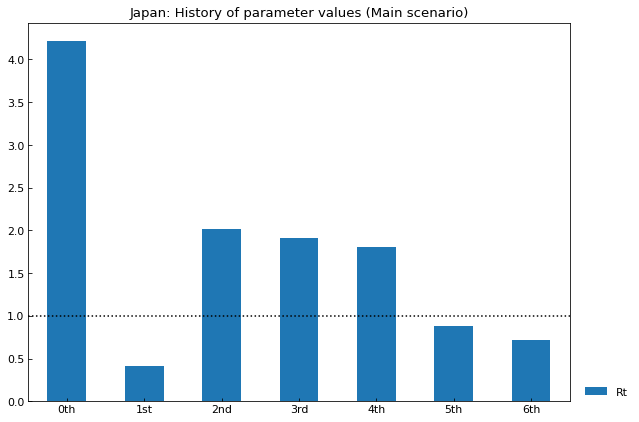

,0th,1st,2nd,3rd,4th,5th,6th
Rt,4.22,0.41,2.02,1.91,1.81,0.88,0.72


In [35]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

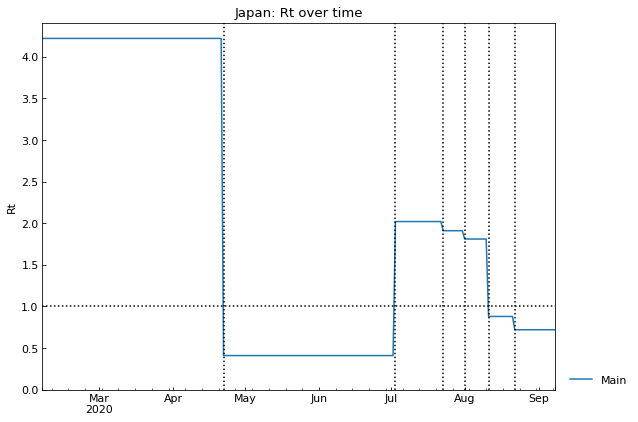

In [36]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

### Simulate the number of cases

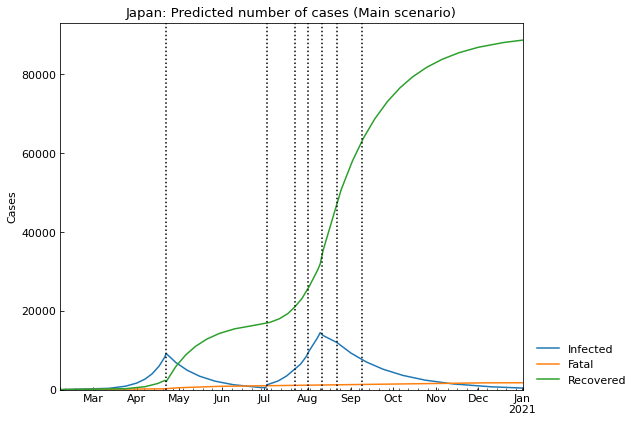

,Date,Confirmed,Fatal,Infected,Recovered
327,2020-12-29,90682,1757,455,88470
328,2020-12-30,90711,1757,444,88510
329,2020-12-31,90741,1758,433,88550
330,2021-01-01,90769,1759,422,88588
331,2021-01-02,90796,1759,411,88626


In [37]:
scenario.clear(name="Main")
scenario.add(end_date="01Jan2021", name="Main")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [38]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.04506517949818282

In [39]:
sigma_new = sigma_current * 2
sigma_new

0.09013035899636564

In [40]:
scenario.clear(name="Medicine")
scenario.add(name="Medicine", days=30, sigma=sigma_current)
scenario.add(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     0th      Past  06Feb2020  21Apr2020   126529100  SIR-F  4.22   
         1st      Past  22Apr2020  02Jul2020   126529100  SIR-F  0.41   
         2nd      Past  03Jul2020  22Jul2020   126529100  SIR-F  2.02   
         3rd      Past  23Jul2020  31Jul2020   126529100  SIR-F  1.91   
         4th      Past  01Aug2020  10Aug2020   126529100  SIR-F  1.81   
         5th      Past  11Aug2020  21Aug2020   126529100  SIR-F  0.88   
         6th      Past  22Aug2020  08Sep2020   126529100  SIR-F  0.72   
         7th    Future  09Sep2020  01Jan2021   126529100  SIR-F  0.72   
Medicine 0th      Past  06Feb2020  21Apr2020   126529100  SIR-F  4.22   
         1st      Past  22Apr2020  02Jul2020   126529100  SIR-F  0.41   
         2nd      Past  03Jul2020  22Jul2020   126529100  SIR-F  2.02   
         3rd      Past  23Jul2020  31Jul2020   126529100  SIR-F  1.91   
         4th      Past  01Aug2020  10Aug2020   126529100  SIR-F  1.81   
         5th      Past  11Aug2020  21Aug2020   126529100  SIR-F  0.88   
         6th      Past  22Aug2020  08Sep2020   126529100  SIR-F  0.72   
         7th    Future  09Sep2020  09Oct2020   126529100  SIR-F  0.72   
         8th    Future  10Oct2020  01Jan2021   126529100  SIR-F  0.36   

                   theta     kappa       rho     sigma  tau  1/beta [day]  \
Scenario Phase                                                              
Main     0th    0.000302  0.001063  0.052213  0.011310  720             9   
         1st    0.067567  0.000571  0.015710  0.034756  720            31   
         2nd    0.000637  0.000117  0.073720  0.036280  720             6   
         3rd    0.000086  0.000144  0.068053  0.035544  720             7   
         4th    0.000718  0.000120  0.054822  0.030220  720             9   
         5th    0.000495  0.000344  0.040763  0.046079  720            12   
         6th    0.015962  0.000121  0.033060  0.045065  720            15   
         7th    0.015962  0.000121  0.033060  0.045065  720            15   
Medicine 0th    0.000302  0.001063  0.052213  0.011310  720             9   
         1st    0.067567  0.000571  0.015710  0.034756  720            31   
         2nd    0.000637  0.000117  0.073720  0.036280  720             6   
         3rd    0.000086  0.000144  0.068053  0.035544  720             7   
         4th    0.000718  0.000120  0.054822  0.030220  720             9   
         5th    0.000495  0.000344  0.040763  0.046079  720            12   
         6th    0.015962  0.000121  0.033060  0.045065  720            15   
         7th    0.015962  0.000121  0.033060  0.045065  720            15   
         8th    0.015962  0.000121  0.033060  0.090130  720            15   

                alpha1 [-]  1/alpha2 [day]  1/gamma [day]      RMSLE Trials  \
Scenario Phase                                                                
Main     0th         0.000             470             44   0.952248   1367   
         1st         0.068             876             14   0.772716   1331   
         2nd         0.001            4288             13  0.0451079   1400   
         3rd         0.000            3467             14  0.0337018    705   
         4th         0.001            4173             16  0.0351116   1500   
         5th         0.000            1454             10  0.0204137   1697   
         6th         0.016            4134             11  0.0257157    525   
         7th         0.016            4134             11          -      -   
Medicine 0th         0.000             470             44   0.952248   1367   
         1st         0.068             876             14   0.772716   1331   
         2nd         0.001            4288             13  0.0451079   1400   
         3rd         0.000            3467             14  0.0337018    705   
         4th         0.001            4173             16  0

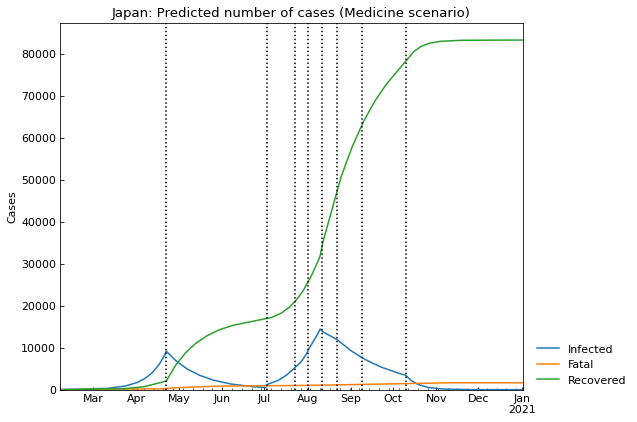

,Date,Confirmed,Fatal,Infected,Recovered
327,2020-12-29,84851,1643,0,83208
328,2020-12-30,84851,1643,0,83208
329,2020-12-31,84851,1643,0,83208
330,2021-01-01,84851,1643,0,83208
331,2021-01-02,84851,1643,0,83208


In [41]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [42]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 02Jan2021,Fatal on 02Jan2021,8th_Rt
Main,14465,10Aug2020,411,1759,-
Medicine,14465,10Aug2020,0,1643,0.36


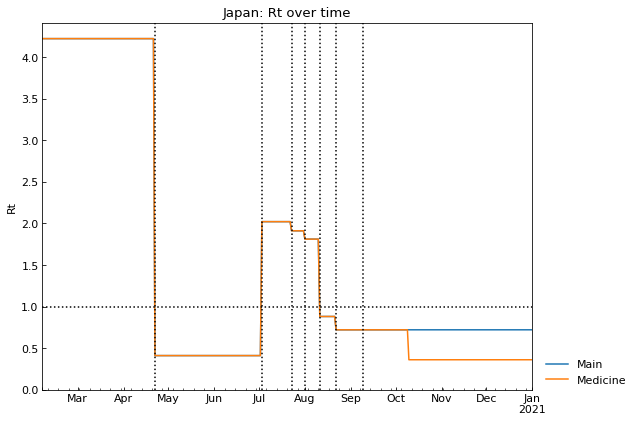

In [43]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

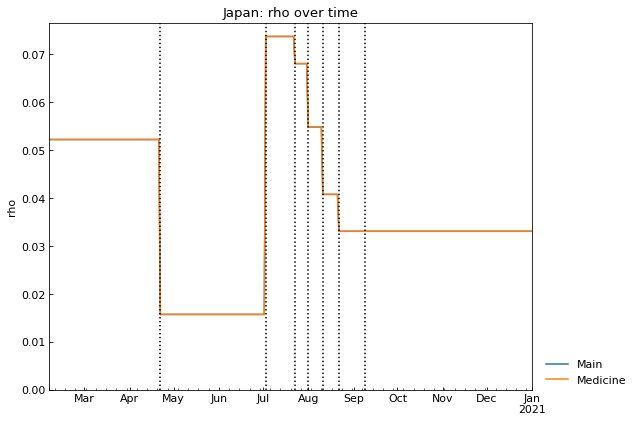

In [44]:
# version >= 2.8.0
_ = scenario.history(target="rho")

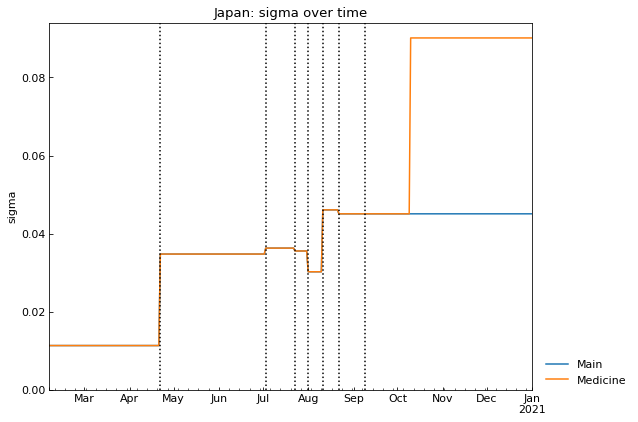

In [45]:
# version >= 2.8.0
_ = scenario.history(target="sigma")

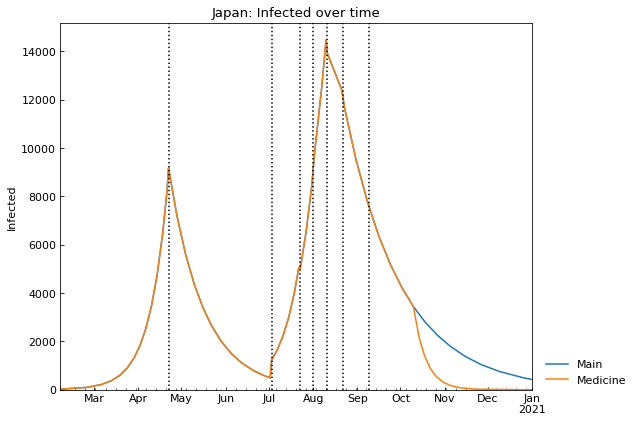

In [46]:
# version >= 2.8.0
_ = scenario.history(target="Infected")